In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
X_train= np.loadtxt('input.csv', delimiter = ',')
y_train= np.loadtxt('labels.csv', delimiter = ',')

X_test= np.loadtxt('input_test.csv', delimiter = ',')
y_test= np.loadtxt('labels_test.csv', delimiter = ',')

In [4]:
X_train=X_train.reshape(len(X_train), 100, 100, 3)
y_train=y_train.reshape(len(y_train), 1)

X_test=X_test.reshape(len(X_test), 100, 100, 3)
y_test=y_test.reshape(len(y_test), 1)

X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
print("shape of X_train", X_train.shape)
print("shape of y_train", X_train.shape)
print("shape of X_test", X_train.shape)
print("shape of X_test", X_train.shape)

shape of X_train (2000, 100, 100, 3)
shape of y_train (2000, 100, 100, 3)
shape of X_test (2000, 100, 100, 3)
shape of X_test (2000, 100, 100, 3)


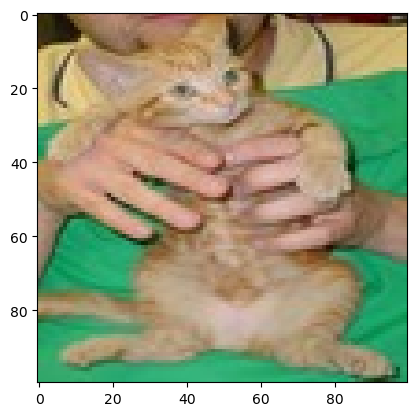

In [6]:
idx= random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [7]:
model = Sequential([
    Conv2D(64, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

C:\Users\tarek\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=9, batch_size=64)

Epoch 1/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.6433 - loss: 0.6255
Epoch 2/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.6625 - loss: 0.6074
Epoch 3/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.7011 - loss: 0.5772
Epoch 4/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.7155 - loss: 0.5583
Epoch 5/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.7333 - loss: 0.5097
Epoch 6/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.7618 - loss: 0.4667
Epoch 7/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.7858 - loss: 0.4427
Epoch 8/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.7984 - loss: 0.4243
Epoch 9/9
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.8569 - loss: 0.3302


In [13]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7185 - loss: 0.5916


[0.5745553374290466, 0.7300000190734863]

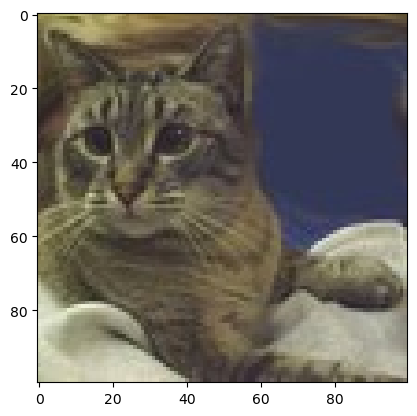

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Our model says it is a Cat


In [16]:
idx2=random.randint(0,len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_predict=model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_predict=y_predict>0.5
if(y_predict==0):
    predict='Dog'
else:
    predict='Cat'

print('Our model says it is a',predict)